In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# **Fetching a data from given link**

In [6]:
url = 'https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv'

In [9]:
# input data  (student to implement fetch function to grab inputs/outputs file and transform accordingly)
# The location to fecth data is:  https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv
def fetch(url):
  data = pd.read_csv(url,sep=',')
  input = data.iloc[:,:-1].to_numpy()
  # output data
  output = data['output'].to_numpy().reshape(-1,1)
  return input, output


In [10]:
inputs, outputs = fetch(url)

In [11]:
inputs

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [13]:
outputs

array([[0],
       [0],
       [1],
       [1]])

# **Determine the number of epochs needed to achieve 99% prediction accuracy**

In [15]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights = self.weights + np.dot(self.inputs.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=5):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            presentError = np.average(np.abs(self.error))
            accuracy = 1 - presentError
            self.error_history.append(presentError)
            self.epoch_list.append(epoch)
            if accuracy >= 0.99:
              print (f'Epoch: {epoch} \nAccuracy: {accuracy}')
              print(f'The required epoch to get 99% accuracy is {epoch}')
              break

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction


In [16]:
# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train(5000)

Epoch: 4058 
Accuracy: 0.9900012868022382
The required epoch to get 99% accuracy is 4058


In [17]:
# create two new examples to predict                                   
example = np.array([[1, 0, 0]])
example_2 = np.array([[0, 1, 1]])


In [18]:
# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.99967599]]  - Correct:  1
[[0.00415332]]  - Correct:  0


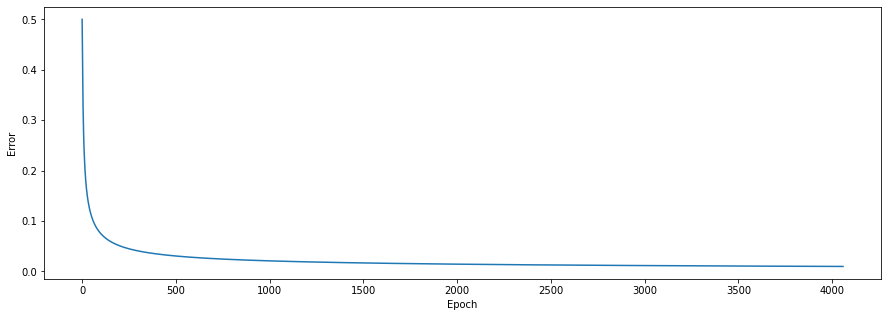

In [19]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# **Determine the number of epochs needed to achieve 99% prediction accuracy with softmax function**

In [28]:
# create NeuralNetwork class for softmax
class SoftNeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function
    def softmax(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return np.exp(x)/sum(np.exp(x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=True)
        self.weights = self.weights + np.dot(self.inputs.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=5):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            presentError = np.average(np.abs(self.error))
            accuracy = 1 - presentError
            self.error_history.append(presentError)
            self.epoch_list.append(epoch)
            if accuracy >= 0.99:
              print (f'Epoch: {epoch} \nAccuracy: {accuracy}')
              print(f'The required epoch to get 99% accuracy is {epoch}')
              break

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction


In [29]:
softNN = SoftNeuralNetwork(inputs,outputs)
softNN.train(500)

In [24]:
# create two new examples to predict                                   
example1 = np.array([[1, 0, 0]])
example2 = np.array([[0, 1, 1]])


In [26]:
# print the predictions for both examples                                   
print(softNN.predict(example1), ' - Correct: ', example1[0][0])
print(softNN.predict(example2), ' - Correct: ', example2[0][0])

[[1.]]  - Correct:  1
[[1.]]  - Correct:  0


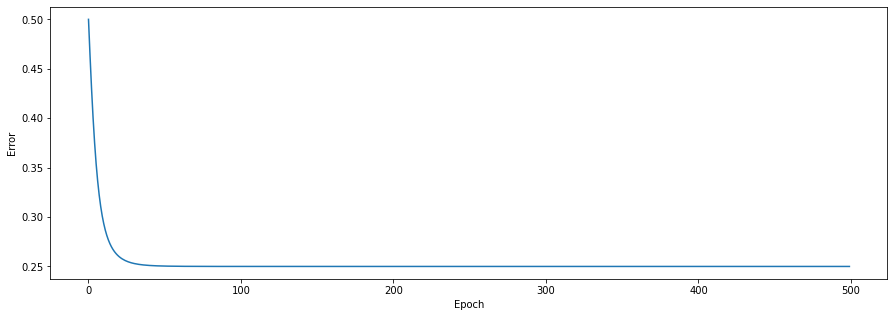

In [27]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(softNN.epoch_list, softNN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()